# Jupyter Notebook per studiare la compensazione isostatica di Airy 

### TASK:

Modellare la compensazione isostatica di Airy sotto un profilo topografico dell' Italia e confrontare i risultati con lo spessore delle crosta terrestre stimato da studi di sismologia.

### WORKFLOW:

(1) Selezionare il profilo topografico

(2) Modificare la densita' delle rocce che compongono la crosta superiore e inferiore per modificare la profondita'di compensazione di Airy

(3) Confrontare lo spessore crostale definito al punto (2) con lo spessore crostale osservato

(4) Confrontare la differenza dei due spessori, spessore calcolato come compensazione di Airy e spessore osservato, con differenti osservabili geofisici.


### Import libraries

In [1]:
# Per il calcolo numerico
import numpy as np

# Per la presentazione grafica dei risultati
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Per le parti interattive del Notebook
from ipywidgets import interact, Layout
import ipywidgets as widgets

#Per visualizzare immagini
from IPython.display import Image
import matplotlib.image as image 



### Compensazione isostatica di Airy

Nel modello di "compensazione isostatica di Airy" si suppone che la massa ridotta al di sotto della superficie sia
associata ad uno spessore eccessivo della crosta, che invade le profondita\' normalmente occupate dal mantello. Il deficit di massa in profondita\' uguaglia esattamene l’eccesso di massa al di sopra del livello del mare.




In [2]:
Image("img/isostasy.jpg",width=8000)


# WORKFLOW

## (1) Selezionare il profilo topografico

Selezioniamo ora un profilo topografico tra quelli mostrati in figura

In [ ]:
plt.figure(figsize = (12,14))
img = plt.imread("img/FIG.topo.jpg")
plt.imshow(img)

PROFILO = widgets.Dropdown(
    options=[('Northern Apennines', 'NAP'), ('Central Apennines', 'CAP'), ('Southern Apennines', 'SAP'), ('Alps', 'ALPS')],
    value='NAP',
    description='Profile:',)
display(PROFILO)

Dropdown(description='Profile:', options=(('Northern Apennines', 'NAP'), ('Central Apennines', 'CAP'), ('South…

### Definizioni

In [4]:
#
# Variabili utilizzate nel Notebook per l'analisi
#
if PROFILO.value == 'NAP':
    label='Northern Apennines'
    print('Reading data for profile:', label)
    topo_file='input/profile.NAP.topo'
    moho_file='input/profile.NAP.moho'
    START_LAB='A'
    END_LAB='A\''
    CLAT=42.4
    CLON=10.8
    ELAT=43.82
    ELON=13.18
    LEN=250
#
if PROFILO.value == 'CAP':
    label='Central Apennines'
    print('Reading data for profile:', label)
    topo_file='input/profile.CAP.topo'
    moho_file='input/profile.CAP.moho'
    START_LAB='B'
    END_LAB='B\''
    CLAT=41.7
    CLON=12.3
    ELAT=42.95
    ELON=14.37
    LEN=220
#
if PROFILO.value == 'SAP':
    label='Southern Apennines'
    print('Reading data for profile:', label)
    topo_file='input/profile.SAP.topo'
    moho_file='input/profile.SAP.moho'
    START_LAB='C'
    END_LAB='C\''
    CLAT=40.2
    CLON=15.2
    ELAT=41.22
    ELON=16.84
    LEN=180
#
if PROFILO.value == 'ALPS':
    label='Alps'
    print('Reading data for profile:', label)
    topo_file='input/profile.ALPS.topo'
    moho_file='input/profile.ALPS.moho'
    START_LAB='D'
    END_LAB='D\''
    CLAT=46.5
    CLON=6.5
    ELAT=44.88
    ELON=8.74
    LEN=250
#
# Additional parameters
rho_mantle=3400.0  # Densita'del mantello (kg/m3)  -- Olivina/Eclogite: 3.3 - 3.5 g/cm³ 
Average_crust_thick=35   # Spessore crostale medio in kilometri
moho_theo_path = './output/estimated_moho.'


Reading data for profile: Northern Apennines


## (2) Modificare la densita' delle rocce che compongono la crosta superiore e inferiore per modificare la profondita'di compensazione di Airy


Calcoliamo la profondita' necessaria per compensare la topografia lungo il profilo scelto, adottando una compensazione di Airy. Assumiamo che l'asse $x$ del sistema sia il profilo su cui calcoliamo le variazioni di spessore crostale. Il profilo e' lungo circa 200 kilometri. Per ogni 10 km dep profilo, calcoliamo lo spesso delle radici con la formula (Equazione nella sezione 1.7.1 delle dispense):

FORMULA:

$$ r_i = h_i \frac{\rho_{upper}}{\rho_{mantle}-\rho_{lower}} $$

VARIABILI:

$r_i$, ispessimento crostale nel punto $i$-esimo del profilo, rispetto allo spessore medio

$h_i$, altezza topografica nel punto $i$-esimo del profilo

$\rho_{upper}$, densita' della crosta superiore (si considera essere quella delle montagne)

$\rho_{mantle}$, densita' delle rocce che compongono il mantello (principalmente olivina)

$\rho_{lower}$, densita' della crosta inferiore (si considera poter essere simile al basalto)


Nei casi di interesse, si puo' far variare la densita'della crosta superiore (per es. ammettendo densita'che vanno dai carbonati, 2300 kg/m3, ai basalti, 3000 kg/m3) e della radice crstale (per es. ammettendo densita'che vanno dalla granulite, 2700 kg/m3, al gabbro, 3200 kg/m3).








In [5]:
results_file = moho_theo_path + PROFILO.value


print('*')
print('* Spessore crostale della topografia lungo il profilo: ' + label + ', in caso di compensazione di Airy')
print('*\n')

#Prendiamo i dati  della topografia lungo il profilo
statfile = open(topo_file, 'r')
km = []
topo = []
linestoken=statfile.readlines()
nstat=0
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    topo0=float(x.split()[3])/1000
    km.append(km0)
    topo.append(topo0)
    #print(nstat,km0,topo0)
    
print('Found', nstat, 'topographic measurements along the profile')


@interact(rho_upper=widgets.FloatSlider(min=2000, max=3000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')), 
                       rho_middle=widgets.FloatSlider(min=2800, max=32000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')), 
                       rho_lower=widgets.FloatSlider(min=2800, max=3000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')),
                       Save=False)


def npa_airy_isostasy(rho_upper,rho_middle,rho_lower,Save):
    
    c = []
    r = []
    x=0
    i=0
    crust = -1.0 * Average_crust_thick
    while i < nstat:
        topo0=topo[i]
        r0 = crust -1.0 * topo0 * rho_upper/(rho_mantle-rho_lower)
        c.append(crust)
        r.append(r0)
        #print(topo[i],r[i])
        i+=1



    fig, (ax1,ax2) = plt.subplots(2,figsize=(15,6))
    #ax1.plot(km,topo, color='gray', linestyle='-', linewidth=4)
    ax1.bar(km, topo, color ='goldenrod', width = 9.7)
    ax1.grid()
    ax1.set_ylabel('Topography (km)')
    ax1.set_xlim(0,LEN)
    ax1.set_ylim(-0.2,3)
    ax1.text(10, 1.65, START_LAB , fontsize=15)
    ax1.text(LEN-10, 1.65, END_LAB , fontsize=15)  
    ax2.grid()
    istat=0
    while istat < nstat:
        x1=km[istat]
        depth1=r[istat]
        rect1 = patches.Rectangle((x1, depth1), 9.7, 30, facecolor='brown')
        ax2.add_patch( rect1 )
        rect2 = patches.Rectangle((x1, crust), 9.7, 30, facecolor='darkgoldenrod')
        ax2.add_patch( rect2 )
        istat+=1
        
    ax2.set_ylabel('Moho depth (km)')
    ax2.set_xlabel('Distance along the profile (km)')
    ax2.set_xlim(0,LEN)
    ax2.set_ylim(-50,-20)
    if Save == True:
        res_file=open(results_file,'w')
        print('\nWriting estimated Moho depth')
        istat=0
        while istat < nstat:
            km0 = km[istat]
            r0 = r[istat]
            res_file.write('%10.1f%12.3f\n' % (km0, r0))  
            istat+=1
        res_file.close
    plt.figure()
    
 




*
* Spessore crostale della topografia lungo il profilo: Northern Apennines, in caso di compensazione di Airy
*

Found 26 topographic measurements along the profile


interactive(children=(FloatSlider(value=2800.0, continuous_update=False, description='rho_upper', layout=Layou…

## (3) Confrontare lo spessore crostale definito al punto (2) con lo spessore crostale osservato


Adesso ripetiamo lésperimento fatto al punto (2) conforntando lo spessore crostale dovuto alla compensazione di Airy con lo spessore crostale osservato da studi sismologici. Nel nostor caso, la profondita' della Moho e' stat presa da una compilazione:


Molinari, I., Morelli, A., 2011. EPcrust: A reference crustal model for the european plate. Geophys. J. Int, 185(1), 352-364, doi: 10.1111/j.1365-246X.2011.04940.x. 



In [10]:
results_file = moho_theo_path + PROFILO.value

print('*')
print('* Spessore crostale della topografia lungo il profilo: ' + label + ', in caso di compensazione di Airy')
print('*\n')

#Prendiamo i dati  della topografia lungo il profilo
statfile = open(topo_file, 'r')
km = []
topo = []
linestoken=statfile.readlines()
nstat=0
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    topo0=float(x.split()[3])/1000
    km.append(km0)
    topo.append(topo0)
    #print(nstat,km0,topo0)

#Prendiamo i dati  della profondita' della Moho lungo il profilo
statfile = open(moho_file, 'r')
km = []
moho = []
linestoken=statfile.readlines()
nstat=0
for x in linestoken:
    nstat+=1 
    km0=float(x.split()[2])
    moho0= -1.0 * float(x.split()[3])
    km.append(km0)
    moho.append(moho0)
    #print(nstat,km0,moho0)

    
print('Found', nstat, 'topographic measurements along the profile')


@interact(rho_upper=widgets.FloatSlider(min=2000, max=3000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')), 
                       rho_middle=widgets.FloatSlider(min=2800, max=32000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')), 
                       rho_lower=widgets.FloatSlider(min=2800, max=3000, step=10, value=2800,
                                        continuous_update=False, layout=Layout(width='90%', height='20px')),
                       Save=False)


def npa_airy_isostasy(rho_upper,rho_middle,rho_lower,Save):
    
    c = []
    r = []
    x=0
    i=0
    crust = -1.0 * Average_crust_thick
    while i < nstat:
        topo0=topo[i]
        r0 = crust -1.0 * topo0 * rho_upper/(rho_mantle-rho_lower)
        c.append(crust)
        r.append(r0)
        #print(topo[i],r[i])
        i+=1



    fig, (ax1,ax2) = plt.subplots(2,figsize=(15,6))
    ax1.bar(km, topo, color ='goldenrod', width = 9.7)
    ax1.grid()
    ax1.set_ylabel('Topography (km)')
    ax1.set_xlim(0,LEN)
    ax1.set_ylim(-0.2,3)
    ax1.text(10, 1.65, START_LAB , fontsize=15)
    ax1.text(LEN-10, 1.65, END_LAB , fontsize=15)  
    ax2.grid()
    istat=0
    while istat < nstat:
        x1=km[istat]
        depth1=r[istat]
        moho1=moho[istat]
        
        rect1 = patches.Rectangle((x1, depth1), 9.7, 30, facecolor='brown', alpha=0.5)
        ax2.add_patch( rect1 )
        rect2 = patches.Rectangle((x1, crust), 9.7, 30, facecolor='darkgoldenrod', alpha=0.5)
        ax2.add_patch( rect2 )
        ax2.scatter(x1,moho1,marker='o',facecolor='red', linewidths=12)
        istat+=1
    
    ax2.set_ylabel('Moho depth (km)')
    ax2.set_xlabel('Distance along the profile (km)')
    ax2.set_xlim(0,LEN)
    ax2.set_ylim(-50,-20)
    if Save == True:
        res_file=open(results_file,'w')
        print('\nWriting estimated Moho depth')
        istat=0
        while istat < nstat:
            km0 = km[istat]
            r0 = r[istat]
            res_file.write('%10.1f%12.3f\n' % (km0, r0))  
            istat+=1
        res_file.close
    plt.figure()
    
 




*
* Spessore crostale della topografia lungo il profilo: Alps, in caso di compensazione di Airy
*

Found 26 topographic measurements along the profile


interactive(children=(FloatSlider(value=2800.0, continuous_update=False, description='rho_upper', layout=Layou…

## (4) Confrontare la differenza di spessore, spessore calcolato come compensazione di Airy meno spessore osservato, con differenti osservabili geofisici.

Possiamo ora confrontare il nostro risultato (spessore crostale dovuto a compensazione di Airy) con altri osservabili geofisici raccolti nell' areale italiano. Sara' interessante notare dove sovra-compensazioni e sotto-compensazioni si correlano con fenomeni quali: sismicita', flusso di calore e ovviamente anomalia di Bouger.





###  Bouger anomaly 

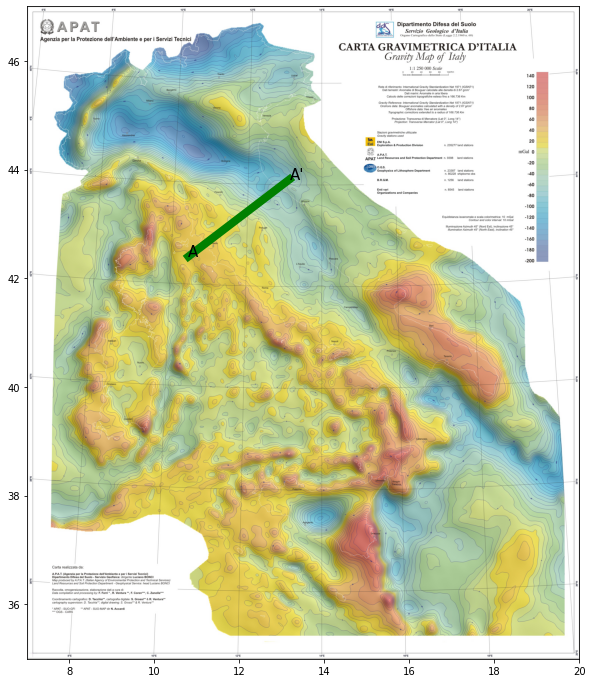

In [5]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/grav_ita.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 20, 35, 47)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,20)
plt.ylim(35,47)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()


###  Flusso di calore al suolo 

In [ ]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/heat_flow_italy.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 19, 37, 46.5)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,19)
plt.ylim(37,46.5)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()


###  Sismicita'

In [ ]:
LON = [CLON,ELON]
LAT = [CLAT,ELAT]

im = plt.imread("img/seismicity.jpg")
plt.figure(figsize=(10,12))
xmin, xmax, ymin, ymax = (7, 19, 37, 47)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.xlim(7,19)
plt.ylim(37,46.5)

plt.plot(LON, LAT, color='green', linewidth=8)
plt.text(CLON, CLAT, START_LAB, fontsize=15)
plt.text(ELON, ELAT, END_LAB, fontsize=15)
plt.show()


In [6]:
%load_ext watermark
%watermark -v -p numpy,matplotlib,ipywidgets

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 8.9.0

numpy     : 1.24.2
matplotlib: 3.6.3
ipywidgets: 8.0.4

